In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("C:/data/promo_order_data.csv")

In [29]:
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,1/1/2021,6,52,36,52,350.70,0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0,52
1,1/1/2021,7,248,104,250,2372.48,2,NaN,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0,248
2,1/1/2021,8,584,168,594,6651.32,4,NaN,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0,584
3,1/1/2021,9,786,196,812,9350.64,10,NaN,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0,786
4,1/1/2021,10,894,200,924,10956.32,8,NaN,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0,894


In [30]:
df.tail()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
2480,5/31/2021,17,18,16,18,358.6,0,NaN,2.0,6.0,0.0,0.0,0.0,0.0,8.0,0,18
2481,5/31/2021,18,10,10,10,380.6,0,NaN,0.0,2.0,0.0,0.0,2.0,0.0,4.0,0,10
2482,5/31/2021,19,4,4,4,69.0,0,NaN,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,4
2483,5/31/2021,20,4,4,4,17.6,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,4
2484,5/31/2021,21,2,2,2,92.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2


In [31]:
df.nunique()

trans_date          151
trans_hour           24
customers          1104
vendors             564
orders             1137
amount             2397
promo_count         131
promo_amount          0
Android             233
GCF                  64
Macintosh             9
Tablet                7
Windows              16
X11                  16
iPhone              675
Blacklisted           3
Not Blacklisted    1099
dtype: int64

In [32]:
df.isna().sum()

trans_date            0
trans_hour            0
customers             0
vendors               0
orders                0
amount                0
promo_count           0
promo_amount       2485
Android              30
GCF                  30
Macintosh            30
Tablet               30
Windows              30
X11                  30
iPhone               30
Blacklisted           0
Not Blacklisted       0
dtype: int64

In [33]:
#DATA CLEANING

data = df.drop(columns = ['promo_amount','Android','GCF','Macintosh','Tablet','Windows','X11','iPhone','Blacklisted','Not Blacklisted'], axis = 1)

data.head(5)

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count
0,1/1/2021,6,52,36,52,350.70,0
1,1/1/2021,7,248,104,250,2372.48,2
2,1/1/2021,8,584,168,594,6651.32,4
3,1/1/2021,9,786,196,812,9350.64,10
4,1/1/2021,10,894,200,924,10956.32,8


In [48]:
# Add Month Column

data['Month'] = data['trans_date'].str[0:1]
data['Month'] = data['Month']
data.tail()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Month
2480,5/31/2021,17,18,16,18,358.6,0,5
2481,5/31/2021,18,10,10,10,380.6,0,5
2482,5/31/2021,19,4,4,4,69.0,0,5
2483,5/31/2021,20,4,4,4,17.6,0,5
2484,5/31/2021,21,2,2,2,92.0,0,5


In [65]:
data_ave = data.groupby('Month').sum()



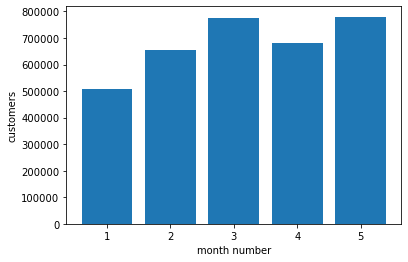

In [66]:
months = range(1,6)

plt.bar(months, data_ave['customers'])
plt.xticks(months)
plt.ylabel('customers')
plt.xlabel('month number')
plt.show()

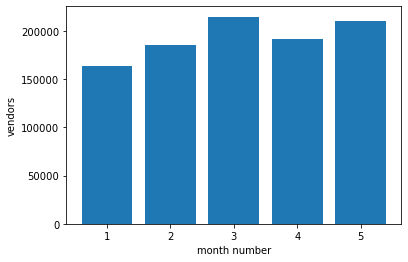

In [67]:
months = range(1,6)

plt.bar(months, data_ave['vendors'])
plt.xticks(months)
plt.ylabel('vendors')
plt.xlabel('month number')
plt.show()

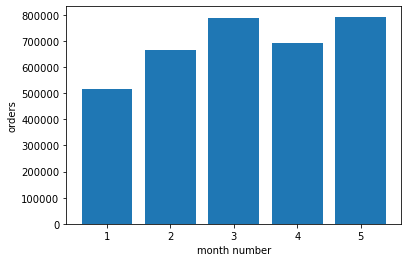

In [69]:
months = range(1,6)

plt.bar(months, data_ave['orders'])
plt.xticks(months)
plt.ylabel('orders')
plt.xlabel('month number')
plt.show()

In [71]:
promo = pd.read_csv("C:/data/promo_order_data.csv", index_col= "trans_date", parse_dates= True)

In [74]:
promo_2021_01_2021_05 = promo.loc['2021-01-01':'2021-05-31']

<AxesSubplot:xlabel='trans_date'>

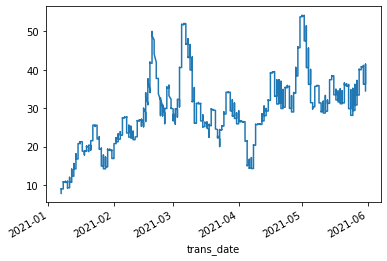

In [78]:
promo_2021_01_2021_05['promo_count'].rolling(window=100).mean().plot()

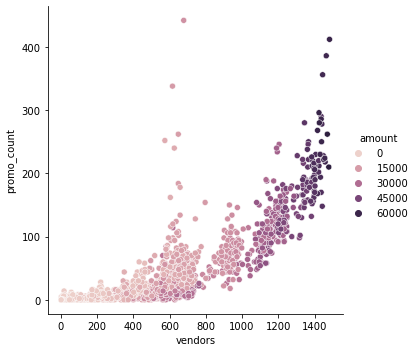

In [79]:
sns.relplot(x = 'vendors', y= 'promo_count', hue = 'amount', data=promo)

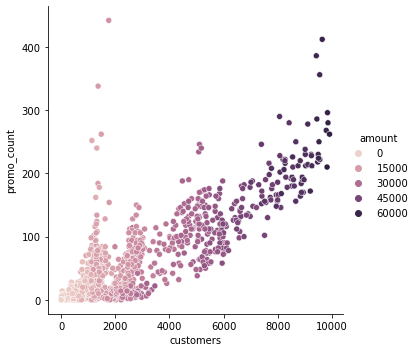

In [80]:
sns.relplot(x = 'customers', y= 'promo_count', hue = 'amount', data=promo)

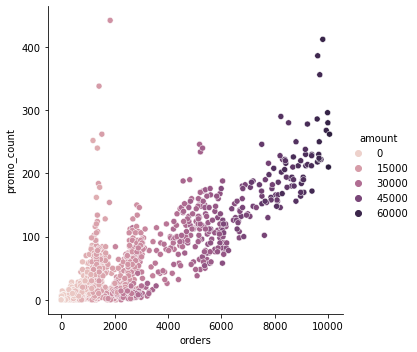

In [81]:
sns.relplot(x = 'orders', y= 'promo_count', hue = 'amount', data=promo)